#  Во что поиграть?


В данном проекте мы будем рассматриваем датасет, содержащий данные об играх. Сначала мы выполняем предобработку данных, в которой ищем дубликаты, а также добавляем новый столбец, отвечающий за суммарные продажи во всех регионах. Далее мы исследуем данные по годам выпуска игр и ищем самые популярные платформы путём анализа продаж по платформам. А также выделим одну перспективную и рассмотрим как влияют и влияют ли оценки критиков и пользователей на суммарные продажи. После рассмотрим распределение игр по жанрам, построим портрет геймера в каждом из регионов. В конце мы проверим 2 гипотезы о равенстве пользовательских оценок сначала для игр на двух разных платформах, а потом для игр из 2 разных жанров.

# 1. Обработка информации

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
data=pd.read_csv('games.csv', sep=',')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим на результаты метода info(). Всего есть 16715 строк в данном датасете. Есть 2 пропуска в колонке наименование, пару сотен пропусков в колонке год выпуска, 2 пропуска в колонке жанр. Также, почти в половине датасета отсутствует оценка критиков, около 6700 пропусков в колонке пользовательских оценок, а также свыше 6 тысяч пропусков в колонке рейтинг.

# 2. Предобработка данных


In [4]:
data.columns= data.columns.str.lower()

Сделали название колонок строчными буквами.

In [5]:
data.duplicated().sum()

0

Явных дубликатов в данных нет.

In [6]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

2

In [7]:
data=data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='last').reset_index(drop=True)

In [8]:
data=data.dropna(subset=['name', 'year_of_release']).reset_index(drop=True)

Удалили строки с пропусками в колонках name и year_of_release. Это не влияет на общий результат исследования.

In [9]:
data['user_score']=data['user_score'].apply(pd.to_numeric, errors='coerce')

Заменили тип данных в колонке, отвечающей за оценки пользователей. Там можно заменить тип данных на float, тк, очевидно, это числовые данные.  

In [10]:
data['full_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  full_sales       16443 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


In [11]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Теперь остались пропуски только в столбцах с оценками и рейтингом. Рассмотрим их подробнее. Моё предположение состоит в том, что большинство игр, неимеющих оценок и рейтинга были выпущены в тот момент, когда ещё не было понятий оценок критиков и пользователей, а ESRB ещё не существовало. Проверим эту гипотезу.


In [12]:
data_no_user_score=data.query('user_score.isna()', engine='python')
data_no_critic_score=data.query('critic_score.isna()', engine='python')
data_no_rating=data.query('rating.isna()', engine = 'python')


In [13]:
data_no_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8981 entries, 1 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8981 non-null   object 
 1   platform         8981 non-null   object 
 2   year_of_release  8981 non-null   float64
 3   genre            8981 non-null   object 
 4   na_sales         8981 non-null   float64
 5   eu_sales         8981 non-null   float64
 6   jp_sales         8981 non-null   float64
 7   other_sales      8981 non-null   float64
 8   critic_score     1089 non-null   float64
 9   user_score       0 non-null      float64
 10  rating           2388 non-null   object 
 11  full_sales       8981 non-null   float64
dtypes: float64(8), object(4)
memory usage: 912.1+ KB


In [14]:
data_no_user_score=data_no_user_score.drop_duplicates().reset_index(drop=True)

In [15]:
data_no_user_score['year_of_release'].value_counts()

year_of_release
2009.0    812
2010.0    788
2008.0    766
2011.0    635
2007.0    568
2006.0    454
2002.0    365
2005.0    356
1998.0    348
2012.0    314
2015.0    309
1999.0    307
2004.0    273
1997.0    271
2003.0    259
1996.0    255
2014.0    252
2000.0    243
2013.0    240
2016.0    240
2001.0    225
1995.0    219
1994.0    120
1993.0     60
1981.0     46
1992.0     42
1991.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: count, dtype: int64

In [16]:
data_no_critic_score['year_of_release'].value_counts()

year_of_release
2009.0    775
2010.0    755
2008.0    712
2011.0    636
2007.0    505
2006.0    386
2015.0    381
1998.0    351
2012.0    332
2014.0    320
1999.0    299
2005.0    284
1997.0    272
2013.0    271
2016.0    270
1996.0    255
1995.0    219
2000.0    207
2002.0    202
2004.0    201
2003.0    190
2001.0    156
1994.0    120
1993.0     60
1981.0     46
1992.0     42
1991.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: count, dtype: int64

In [17]:
data_no_rating['year_of_release'].value_counts()

year_of_release
2010.0    456
2008.0    446
2011.0    433
2009.0    415
2007.0    376
1998.0    347
2006.0    328
2012.0    298
1999.0    296
2015.0    291
1997.0    270
1996.0    256
2014.0    236
2005.0    233
2013.0    228
2016.0    222
1995.0    219
2000.0    202
2002.0    174
2004.0    164
2003.0    162
2001.0    143
1994.0    120
1993.0     60
1981.0     46
1992.0     41
1991.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: count, dtype: int64

Посмотрев данные, где нет оценок и рейтинга, по годам, нельзя сделать никакого вывода. Далее посмотрим на средние продажи таких игр

In [18]:
data_no_user_score.groupby('year_of_release').agg(objects=('name', 'count'), sales=('full_sales', 'mean'))

,objects,sales
year_of_release,,
1980.0,9,1.264444
1981.0,46,0.775652
1982.0,36,0.802222
1983.0,17,0.988235
1984.0,14,3.596429
1985.0,13,4.146923
1986.0,21,1.765714
1987.0,16,1.356250
1988.0,14,3.370000


In [19]:
data_no_critic_score.groupby('year_of_release').agg(objects=('name', 'count'), sales=('full_sales', 'mean'))

,objects,sales
year_of_release,,
1980.0,9,1.264444
1981.0,46,0.775652
1982.0,36,0.802222
1983.0,17,0.988235
1984.0,14,3.596429
1985.0,13,4.146923
1986.0,21,1.765714
1987.0,16,1.356250
1988.0,14,3.370000


In [20]:
data_no_rating.groupby('year_of_release').agg(objects=('name', 'count'), sales=('full_sales', 'mean'))

,objects,sales
year_of_release,,
1980.0,9,1.264444
1981.0,46,0.775652
1982.0,36,0.802222
1983.0,17,0.988235
1984.0,14,3.596429
1985.0,13,4.146923
1986.0,21,1.765714
1987.0,16,1.356250
1988.0,14,3.370000


В случае рассмотрения продаж появляется довольно интересная закономерность. Начиная с 90х годов, оценок и рейтинга не имеют игры, проданные в размере менее миллиона копий. Отсуствие рейтинга у игр раньше 1990 года можно объяснить тем, что не было возможности собрать данные по оценкам, а при сборе таковых позже, эти оценки можно было считать необъективными.

Таким образом, в ходе предобработки данных мы изменили название колонок(преобразовали их в нижний регистр), удалили строчки с пропусками в основных данных об играх(наименование и год издания), создали колонку, отображающую общее число продаж, исследовали природу появления большого количества пропусков в колонках с пользовательскими оценками, оценками критиков и рейтингом игры, заменили значения tbd на пропуски. 

# 3. Исследовательский анализ данных

In [21]:
data['year_of_release'].value_counts()

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     652
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: count, dtype: int64

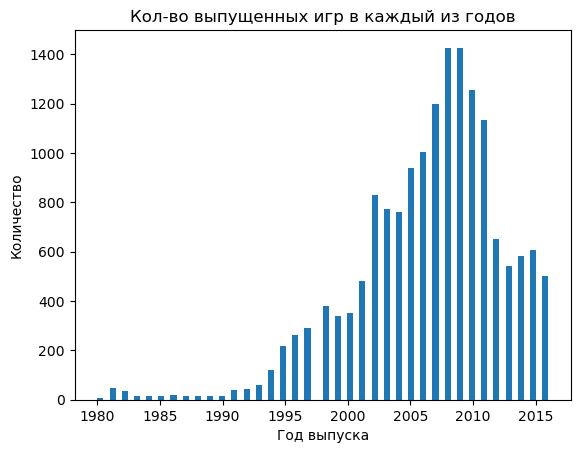

In [25]:
figure, axs = plt.subplots()

axs.hist(data['year_of_release'], bins=74)
axs.set_title('Кол-во выпущенных игр в каждый из годов')
axs.set_xlabel("Год выпуска")
axs.set_ylabel("Количество");

Видим результат выполнения метода value_counts() и построенную диграмму. "Психологическую" отметку в 200 произведенных игр индустрия преодолела лишь в 1995 году. Далее идет постепенный подъём и пик в 2008 и 2009 годах, далее с 2012 по 2015 спад. Чем обусловлен этот спад, предположений не имею. Считаю, что данные по играм, произведенным ранее 1995 года не сильно влияют на общий результат, поэтому рассмотрение промежутка с 1984 по 1994 год не столь важно.

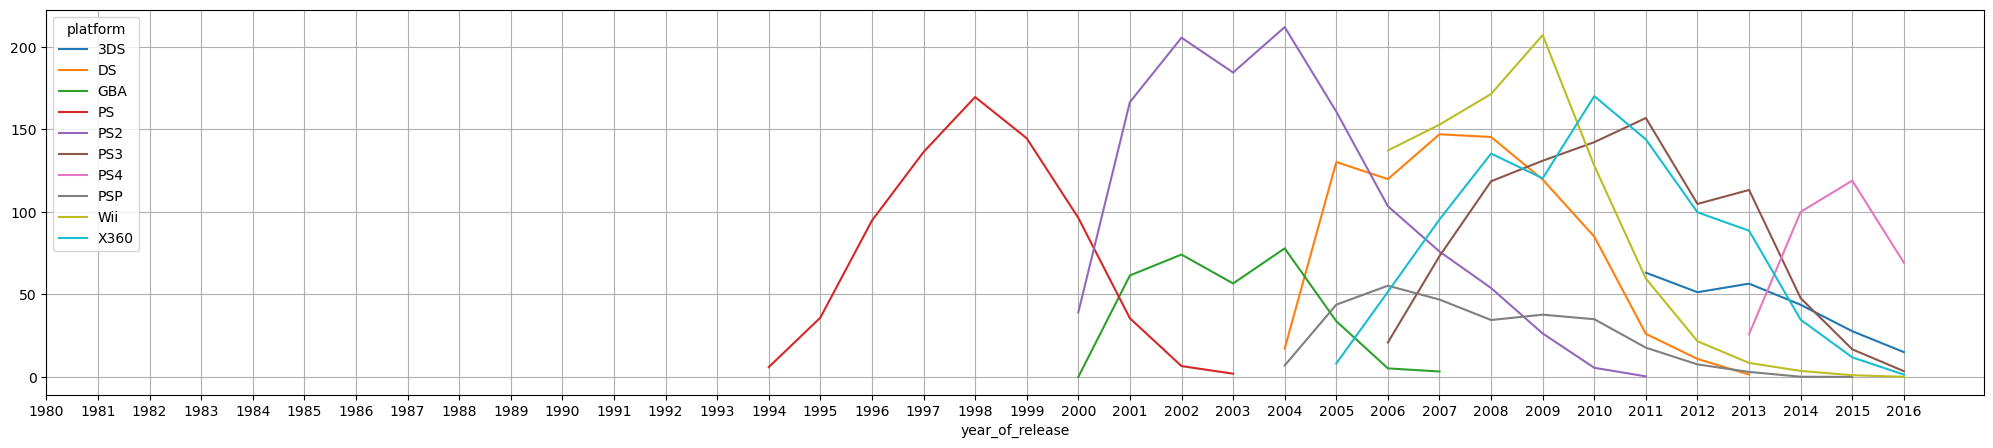

In [26]:
data_top_platform=data.groupby('platform')['full_sales'].sum().sort_values().tail(10).index
ax=(data.query('platform in @data_top_platform')
    .pivot_table(index='year_of_release', columns='platform', values='full_sales', aggfunc='sum')
    .plot(figsize=(25,5), grid =True))
ax.set_xticks(data['year_of_release'].dropna().unique());

Смотрим на график: первые игры, вышедшие на одну из 10 популярнейших платформ появилась в 1994 году. Она была выпущена на первыый playstation. Подъём этой платформы занял 4 года: с 1994 по 1998 года. Далее идёт PS2 и её суммарный подъём также можно обозначить 4мя годами: с 2000 по 2004 года. Параллельно была похожая история, но в меньших масштабах, у игр на game boy. С 2004 по 2008 года набирает популярнгсть Nintendo Ds. С 2006 по 2009 года был резкий взлёт платформы Wii, ещё одной из разновидностей нинтендо, но после 2009 года спад по гиперболической траектории к 2016 году. С 2005 по 2010 года набирала популярность платформа xbox 360. С 2004 по 2006 подъём продаж игр для карманных приставок PSP, однако после 2006 года идёт медленный спад к 2015 году. В 2006 году начинает набирать популярность платформа PS3. После 2010 года у неё также наблюдается спад. С 2013 года популярность набрала PS4, но 2015-2016 года охарактеризовались спадом продаж игр на эту платформу. В 2011 году была популярна платформа 3DS, однако впоследствие продажи игр на этой платформе лишь падали. 

In [27]:
(
    data.query('platform in @data_top_platform')
    .pivot_table(index='year_of_release', columns='platform', values='full_sales', aggfunc='sum').head(2)
)

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985.0,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data_anomaly=data.loc[(data['platform']=='DS')&(data['year_of_release']==1985)]
data_anomaly
data=data.drop(index=15703)
data=data.reset_index(drop=True)

Увидели аномалию по платформе DS, проанализировали, удалили

Актуальным периодом будем считать 2015-2016 год. 

In [29]:
data_actual=data.loc[data['year_of_release']>2014]

In [30]:
data_top_actual_index=data_actual.groupby('platform')['full_sales'].sum().sort_values().tail(10).index
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39


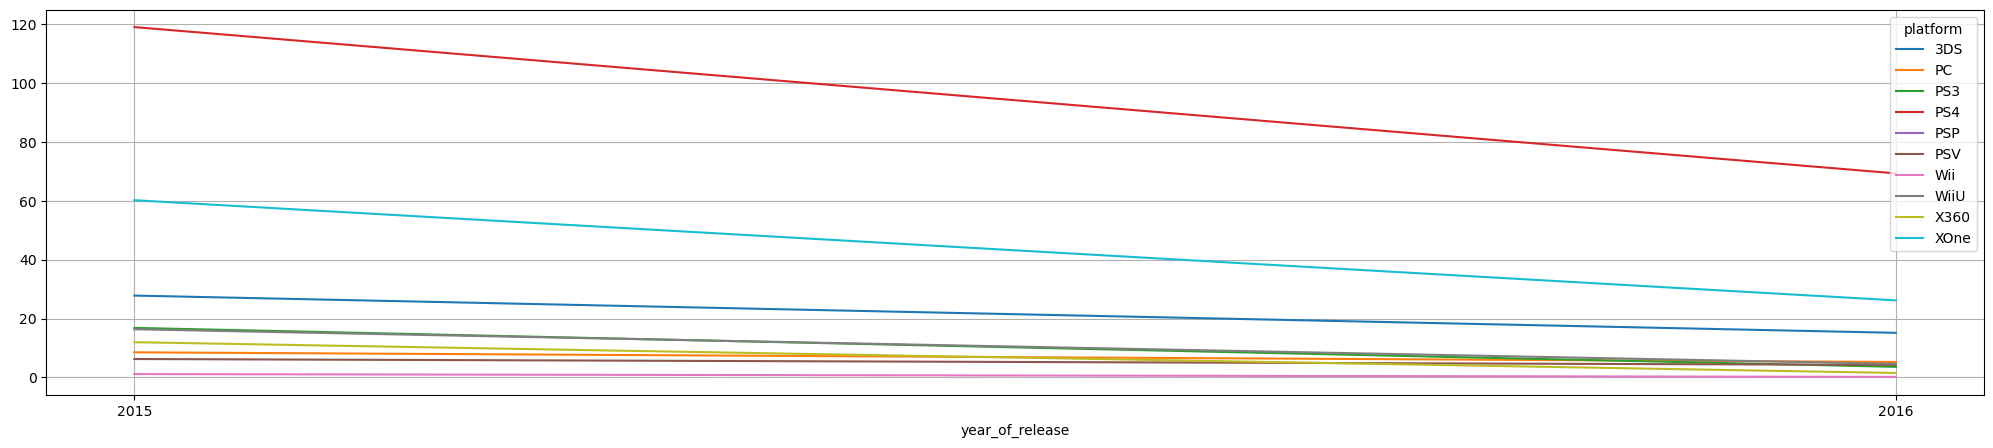

In [31]:
ax=(data_actual.query('platform in @data_top_actual_index')
    .pivot_table(index='year_of_release', columns='platform', values='full_sales', aggfunc='sum')
    .plot(figsize=(25,5), grid =True))
ax.set_xticks(data_actual['year_of_release'].dropna().unique());

Актуальные платформы- PS4, xbox one, 3DS

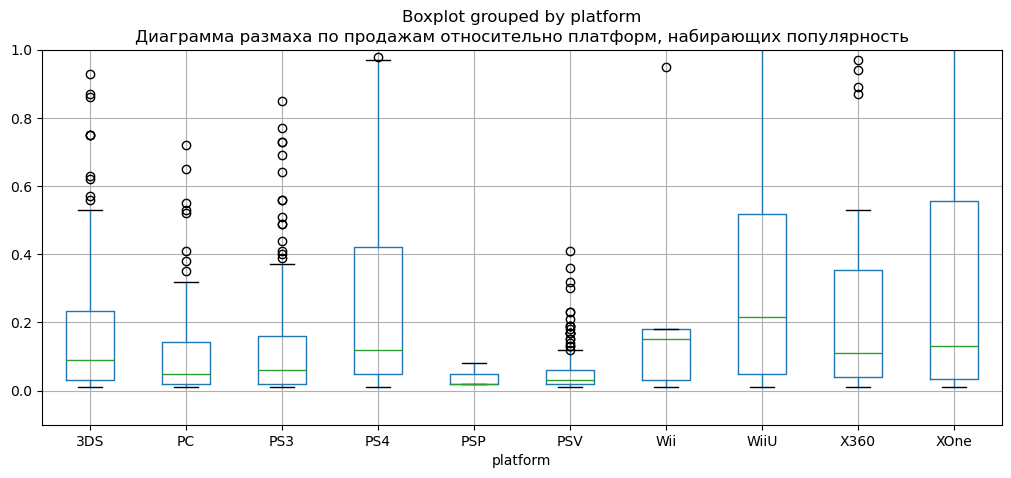

In [37]:
(data_actual.boxplot('full_sales', by='platform', figsize=(12,5))
.set_title('Диаграмма размаха по продажам относительно платформ, набирающих популярность'));
plt.ylim(-0.1, 1);

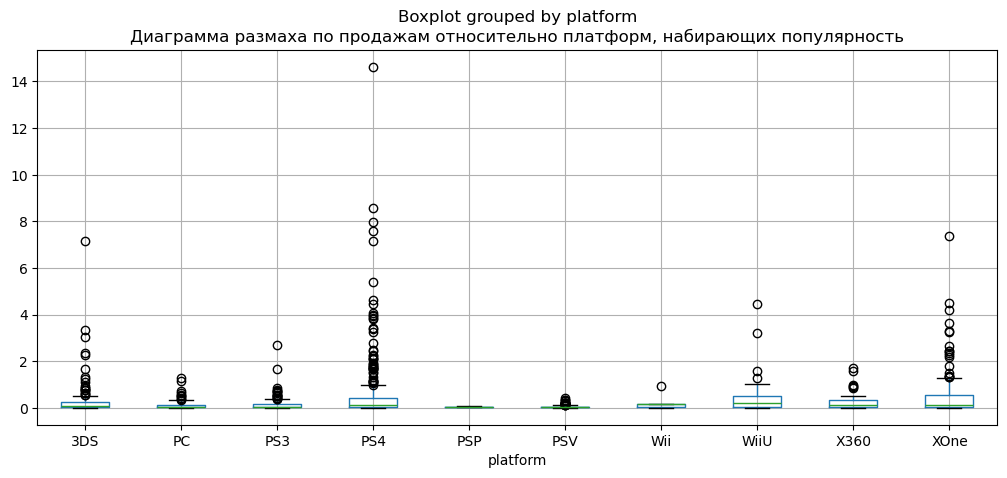

In [38]:
(data_actual.boxplot('full_sales', by='platform', figsize=(12,5))
.set_title('Диаграмма размаха по продажам относительно платформ, набирающих популярность'));
# plt.ylim(-0.1, 1);

In [39]:
data_ps4=data.query('platform=="PS4"')

In [40]:
data_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


            full_sales  user_score
full_sales    1.000000   -0.031957
user_score   -0.031957    1.000000


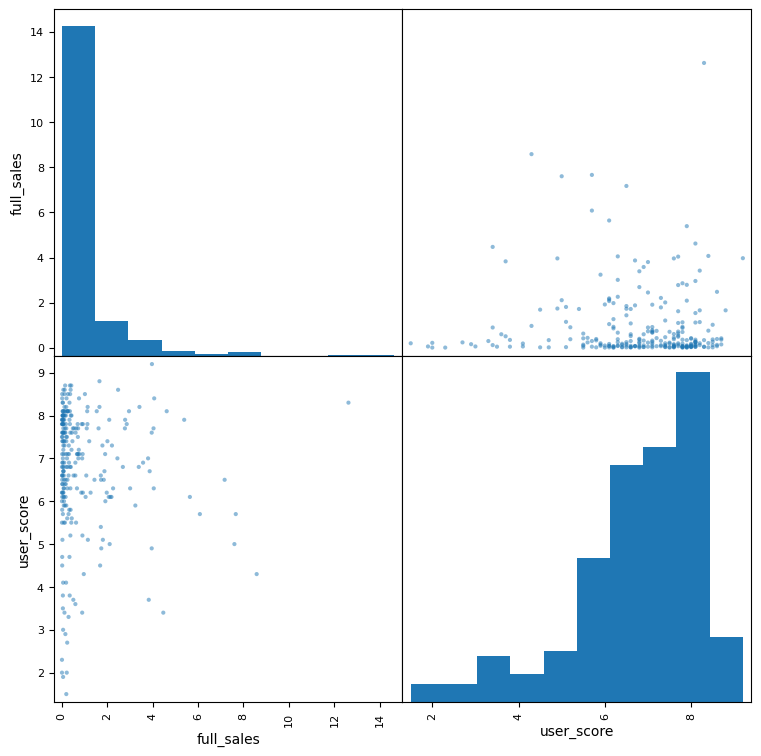

In [41]:
ps4_data_users=data_ps4[['full_sales', 'user_score']]


print(ps4_data_users.corr())
pd.plotting.scatter_matrix(ps4_data_users, figsize=(9,9));

              full_sales  critic_score
full_sales      1.000000      0.406568
critic_score    0.406568      1.000000


array([[<Axes: xlabel='full_sales', ylabel='full_sales'>,
        <Axes: xlabel='critic_score', ylabel='full_sales'>],
       [<Axes: xlabel='full_sales', ylabel='critic_score'>,
        <Axes: xlabel='critic_score', ylabel='critic_score'>]],
      dtype=object)

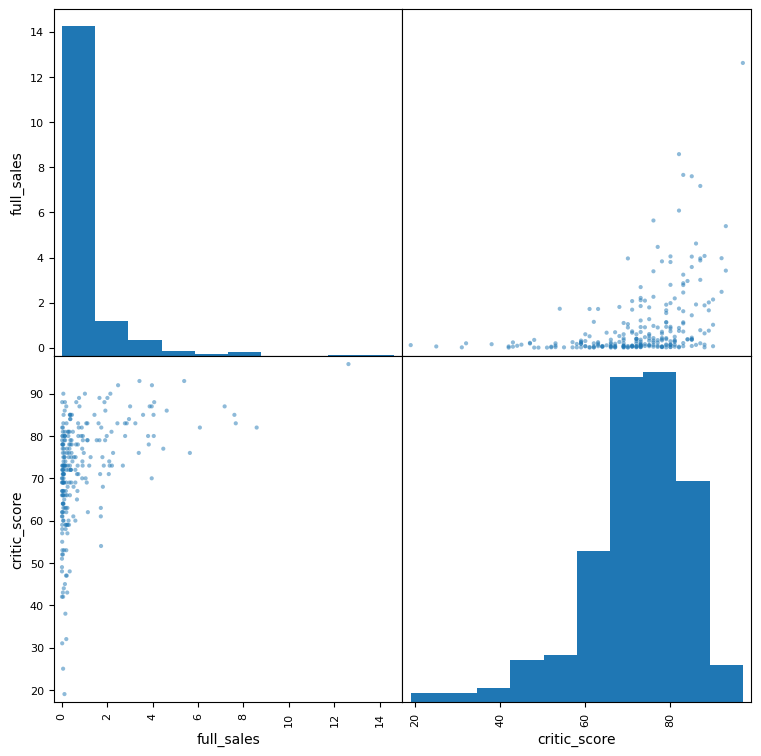

In [42]:
ps4_data_critic=data_ps4[['full_sales', 'critic_score']]


print(ps4_data_critic.corr())
pd.plotting.scatter_matrix(ps4_data_critic, figsize=(9,9))

Посмотрим на диаграммы рассеяния: легко увидеть, сравнив 2 диаграммы, что игры, которые можно считать выбросами на этой диаграмме получили оценки у критиков выше, чем у пользователей, этим можно объяснить более видную связь между оценками критиков и продаваемостью игр.

In [43]:
data_ps3=data.query('platform=="PS3"')

            full_sales  user_score
full_sales     1.00000     0.12949
user_score     0.12949     1.00000


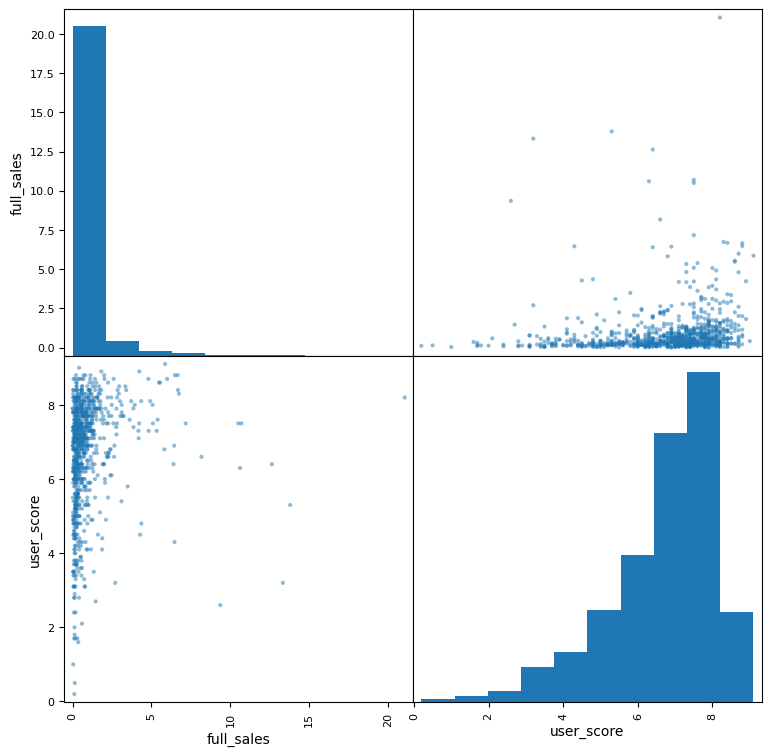

In [44]:
ps3_data_users=data_ps3[['full_sales', 'user_score']]
print(ps3_data_users.corr())
pd.plotting.scatter_matrix(ps3_data_users, figsize=(9,9));

              full_sales  critic_score
full_sales      1.000000      0.432164
critic_score    0.432164      1.000000


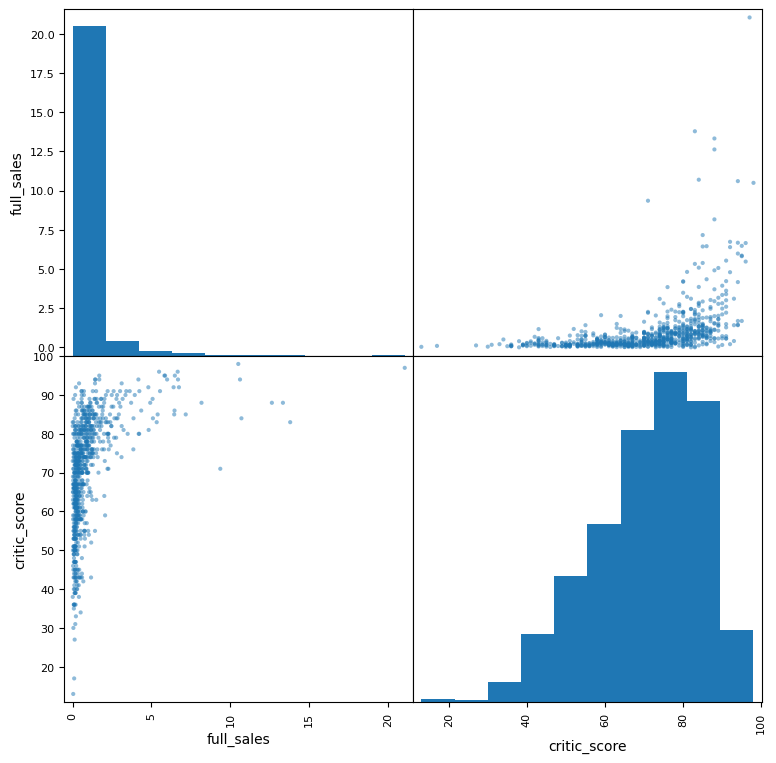

In [45]:
ps3_data_critic=data_ps3[['full_sales', 'critic_score']]


print(ps3_data_critic.corr())
pd.plotting.scatter_matrix(ps3_data_critic, figsize=(9,9));

In [46]:
data_xone=data.query('platform=="XOne"')

            full_sales  user_score
full_sales    1.000000   -0.068925
user_score   -0.068925    1.000000


array([[<Axes: xlabel='full_sales', ylabel='full_sales'>,
        <Axes: xlabel='user_score', ylabel='full_sales'>],
       [<Axes: xlabel='full_sales', ylabel='user_score'>,
        <Axes: xlabel='user_score', ylabel='user_score'>]], dtype=object)

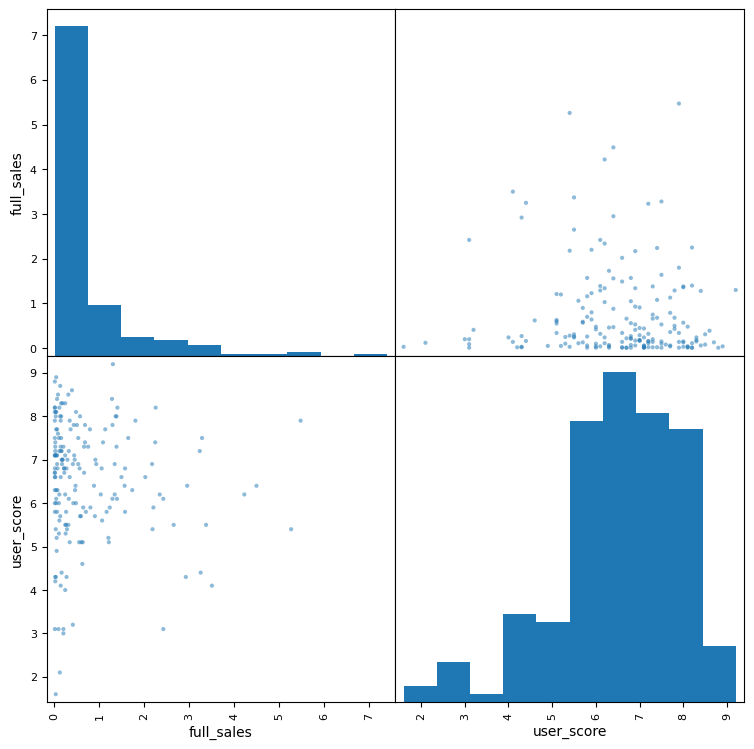

In [47]:
xone_data_users=data_xone[['full_sales', 'user_score']]


print(xone_data_users.corr())
pd.plotting.scatter_matrix(xone_data_users, figsize=(9,9))

              full_sales  critic_score
full_sales      1.000000      0.416998
critic_score    0.416998      1.000000


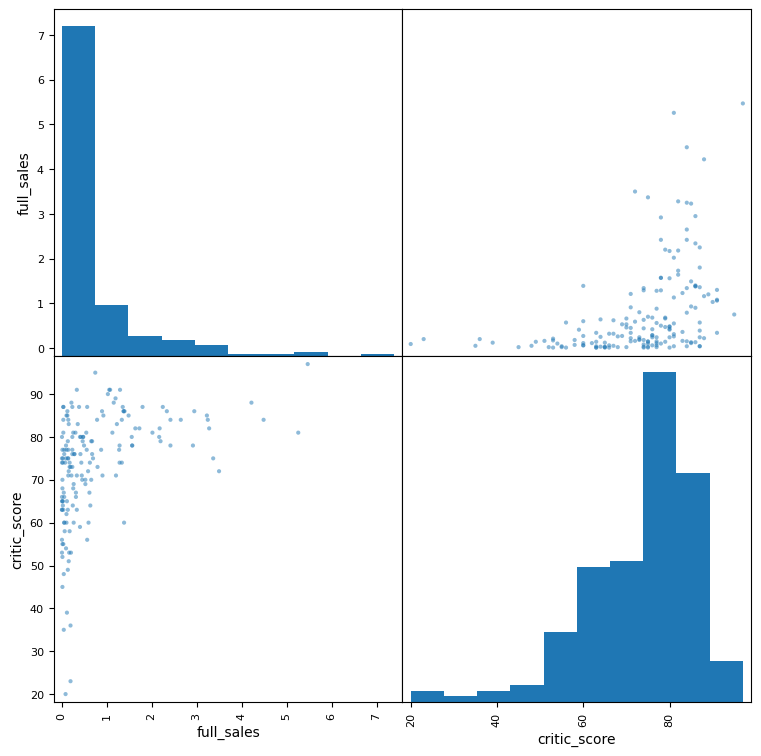

In [48]:
xone_data_critic=data_xone[['full_sales', 'critic_score']]


print(xone_data_critic.corr())
pd.plotting.scatter_matrix(xone_data_critic, figsize=(9,9));

Ситуация при рассмотрении других конкурирующих платформ (PS3, xbox one) отражает, что наиболее продаваемые игры оценены критиками выше, чем пользователями. Отсюда делаем вывод, что такая ситуация может быть для большинства игр, отсюда и коэффициент корреляции между оценками критиков и продажами игр выше, чем такой же у пользовательских оценок.

In [49]:
data.groupby('genre').agg(objects=('name', 'count'), sales=('full_sales', 'sum')).sort_values(by='sales', ascending=False)

,objects,sales
genre,,
Action,3306,1716.50
Sports,2305,1307.11
Shooter,1296,1041.36
Role-Playing,1481,931.08
Platform,878,825.55
Misc,1721,790.29
Racing,1226,723.49
Fighting,837,442.66
Simulation,857,387.96


Смотрим на результат: Видим, что наибольшей популярностью пользуются игры жанра action. Они также представлены в наибольшем количестве в нашей выборке. Далее продажи по жанрам идут по ниспадающей. Сильных выбросов сверху не видим. Наименее продаваемыми являются игры жанров adventure и strategy. При этом стратегии представлены в почти два раза меньшем количестве игр, в отличие от приключений. Но все равно нельзя сказать, что это провальные по продажам жанры. 

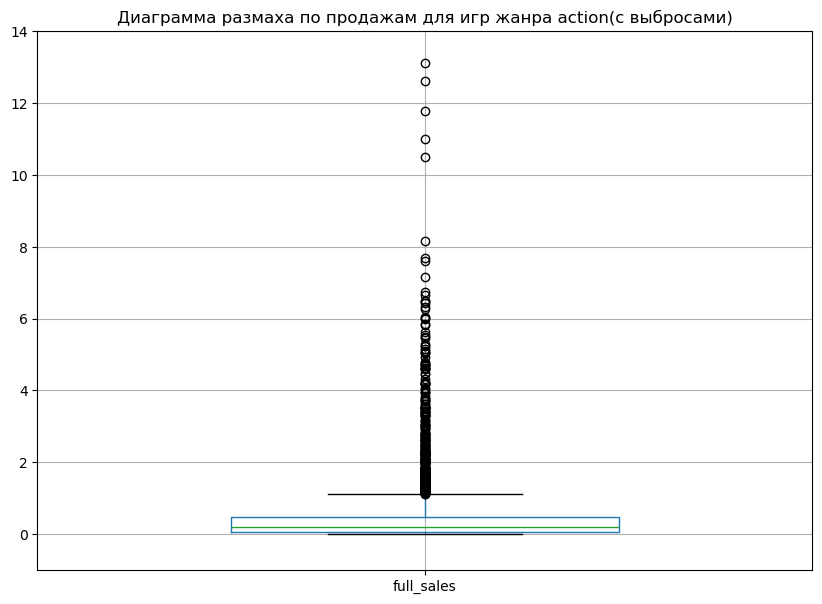

In [50]:
data.query('genre=="Action"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра action(с выбросами)");

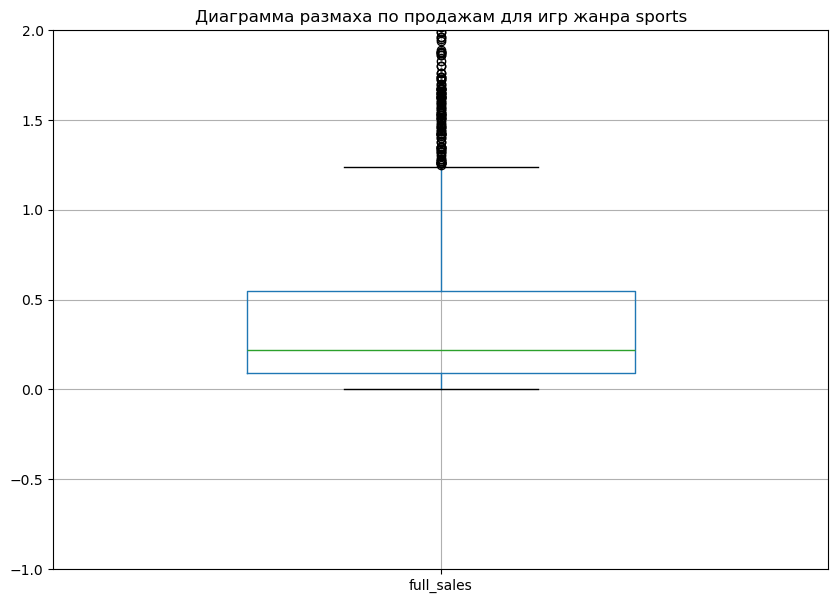

In [51]:
data.query('genre=="Sports"').boxplot(figsize=(10,7))
plt.ylim(-1, 2)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра sports");

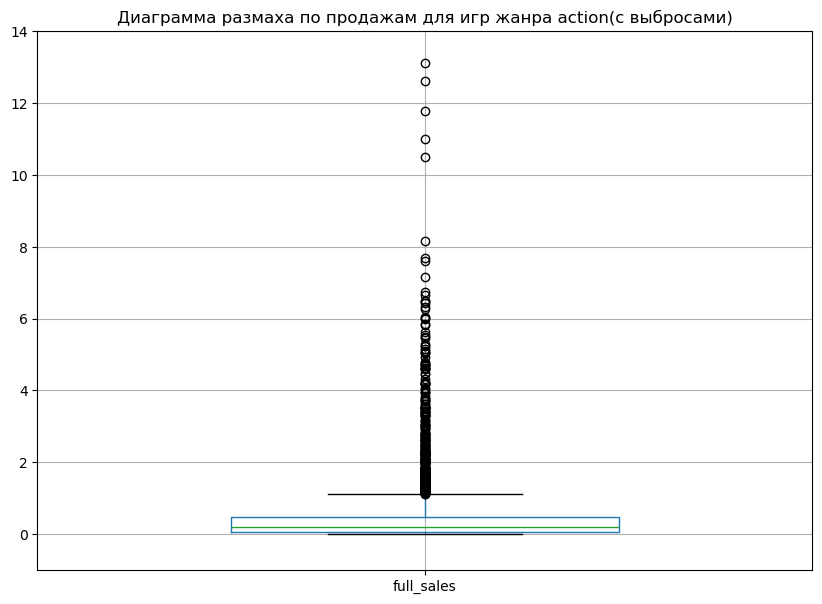

In [52]:
data.query('genre=="Action"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра action(с выбросами)");

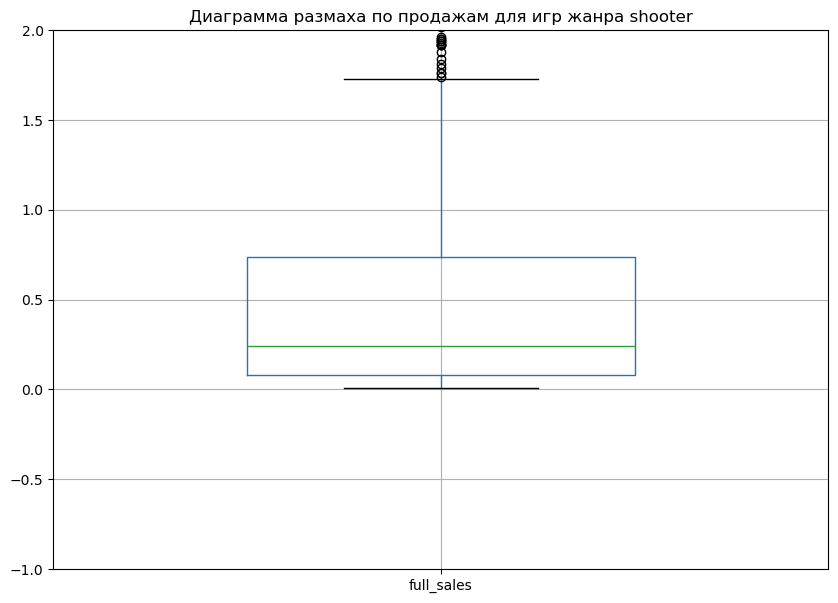

In [53]:
data.query('genre=="Shooter"').boxplot(figsize=(10,7))
plt.ylim(-1, 2)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра shooter");

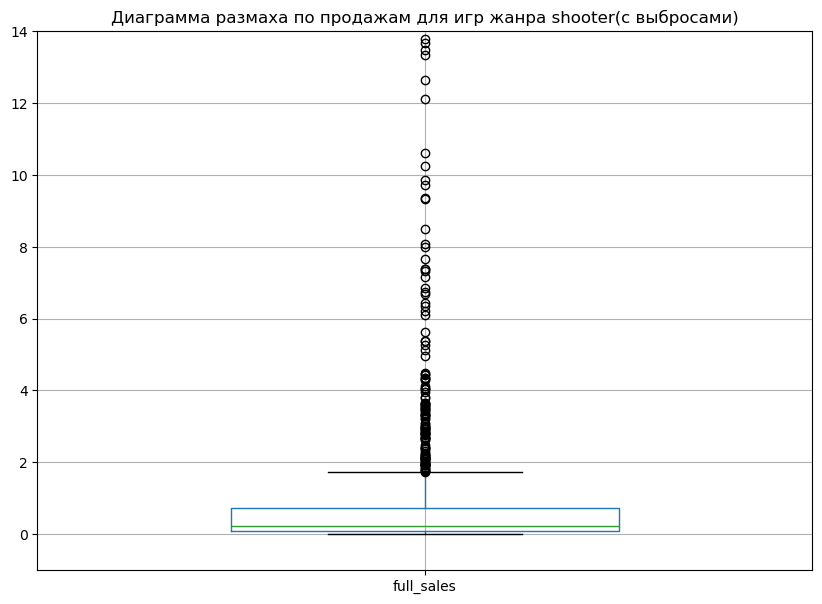

In [54]:
data.query('genre=="Shooter"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра shooter(с выбросами)");

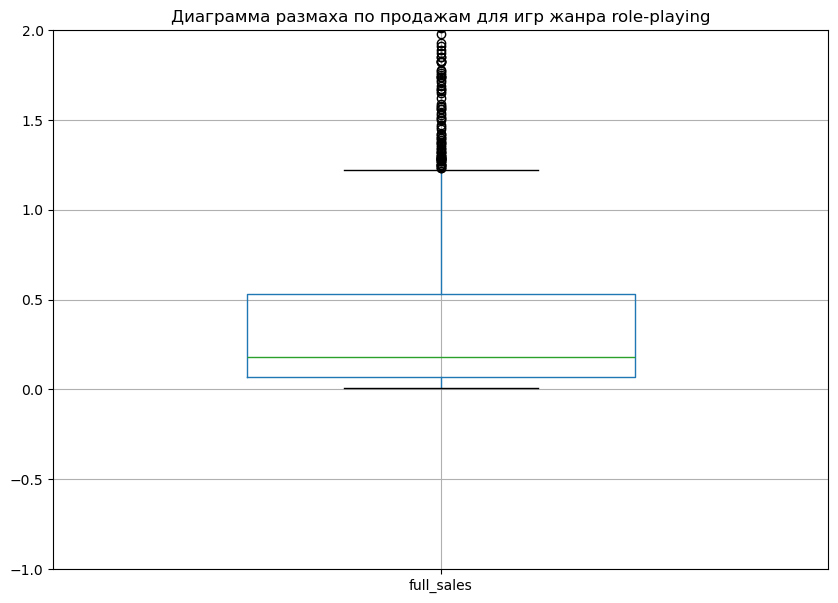

In [55]:
data.query('genre=="Role-Playing"').boxplot(figsize=(10,7))
plt.ylim(-1, 2)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра role-playing");

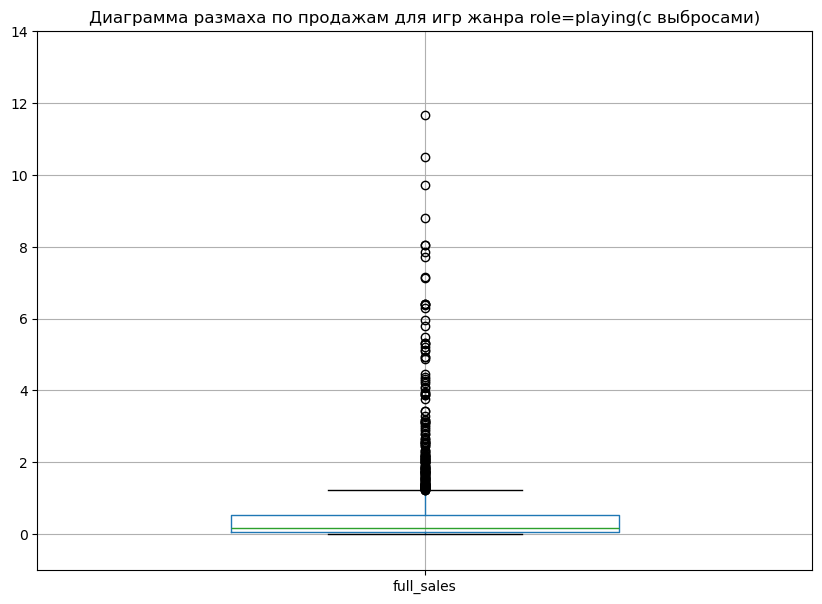

In [56]:
data.query('genre=="Role-Playing"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра role=playing(с выбросами)");

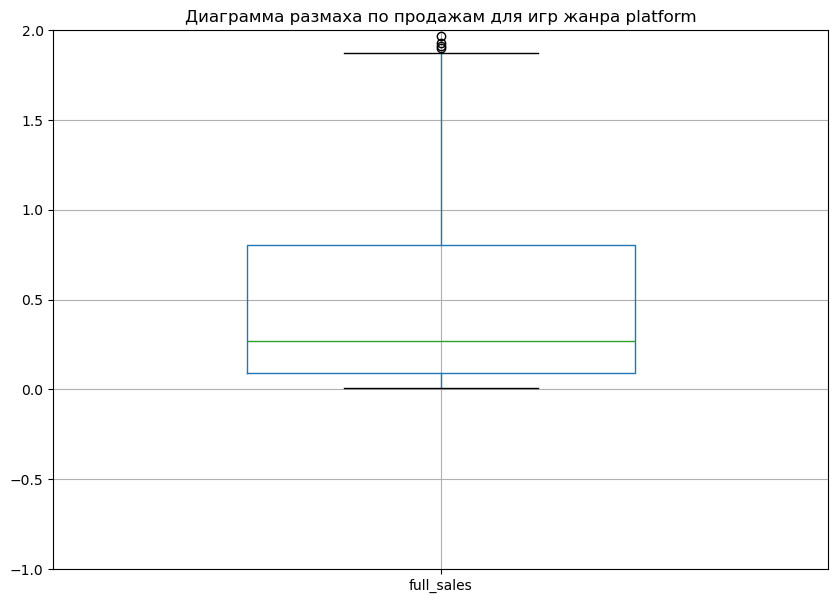

In [57]:
data.query('genre=="Platform"').boxplot(figsize=(10,7))
plt.ylim(-1, 2)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра platform");

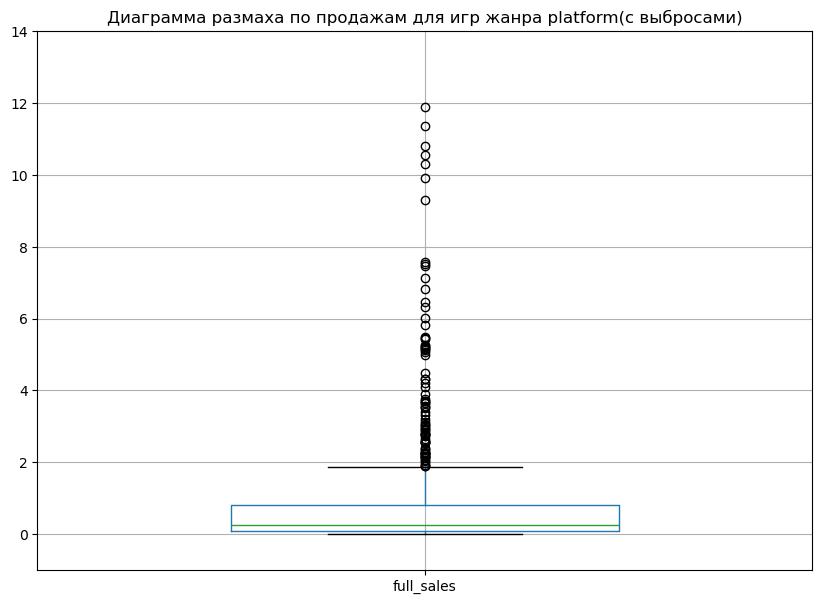

In [58]:
data.query('genre=="Platform"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра platform(с выбросами)");

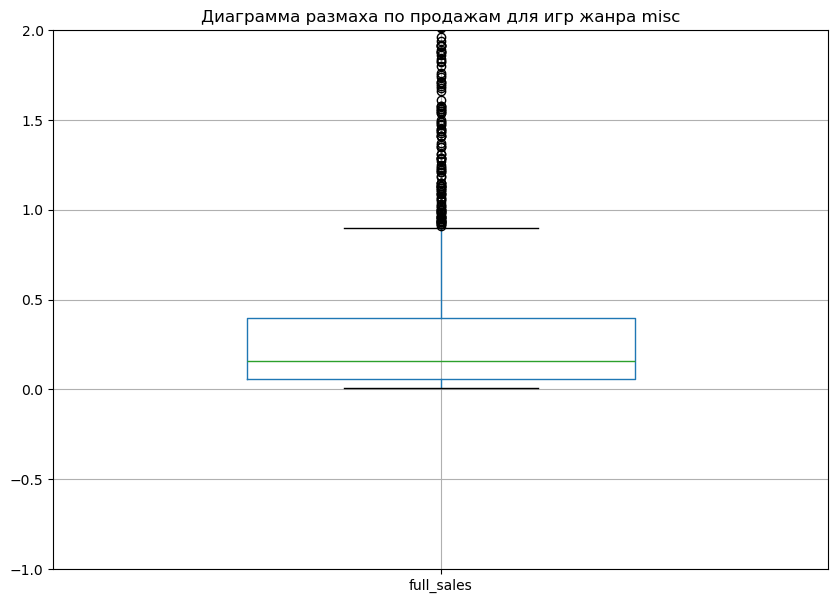

In [59]:
data.query('genre=="Misc"').boxplot(figsize=(10,7))
plt.ylim(-1, 2)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра misc");

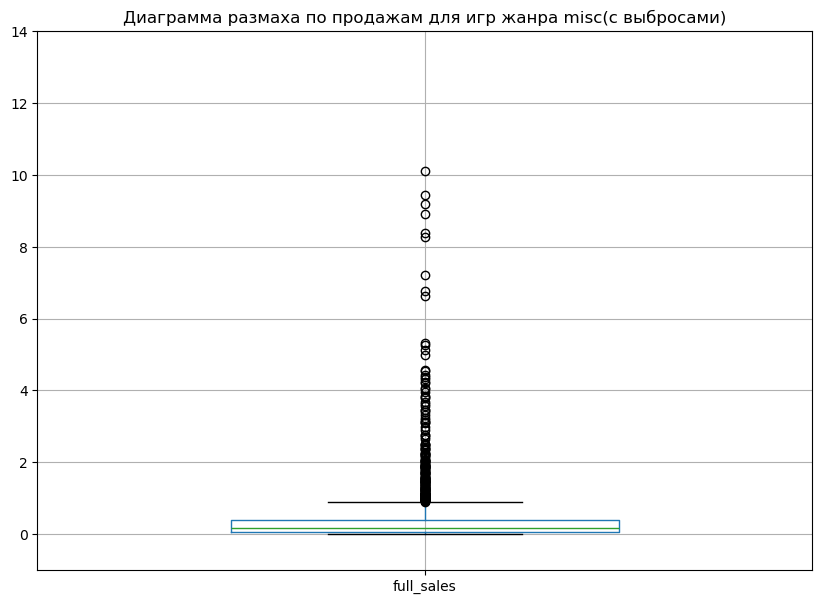

In [60]:
data.query('genre=="Misc"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра misc(с выбросами)");

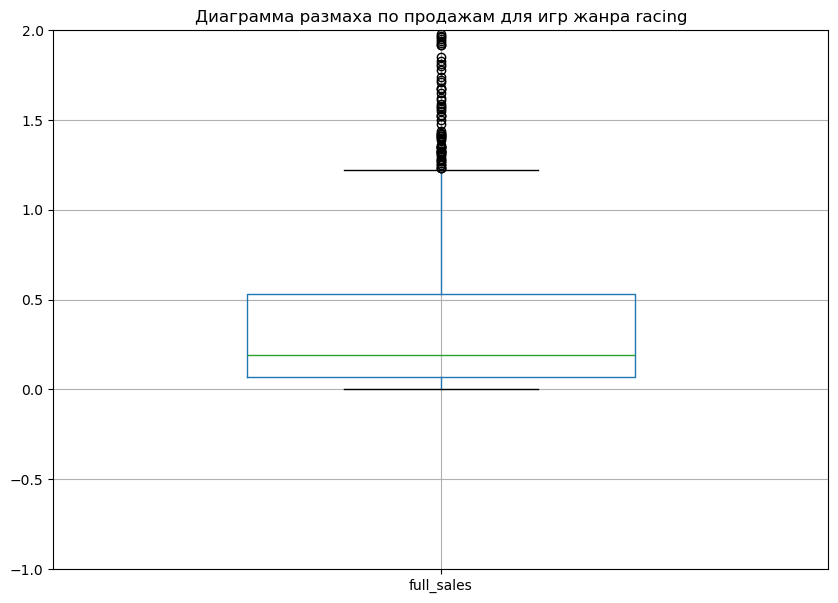

In [61]:
data.query('genre=="Racing"').boxplot(figsize=(10,7))
plt.ylim(-1, 2)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра racing");

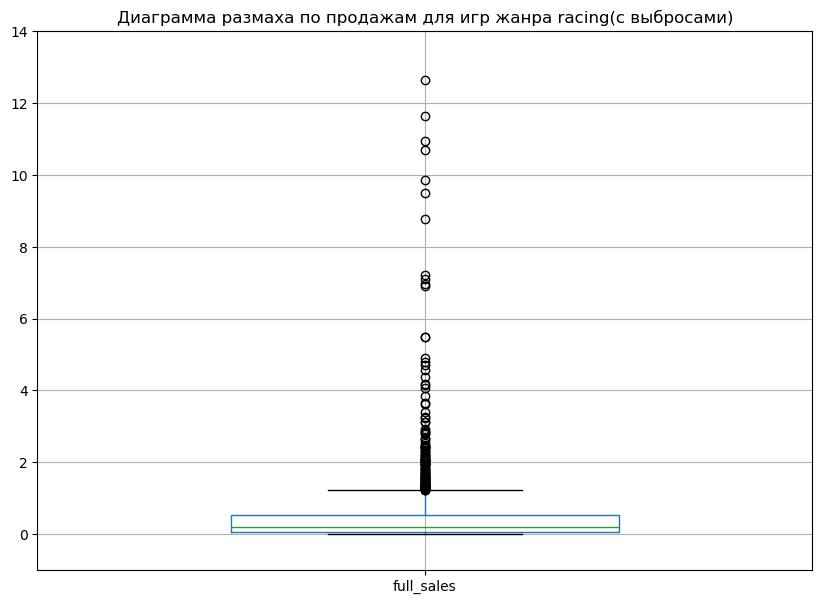

In [62]:
data.query('genre=="Racing"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра racing(с выбросами)");

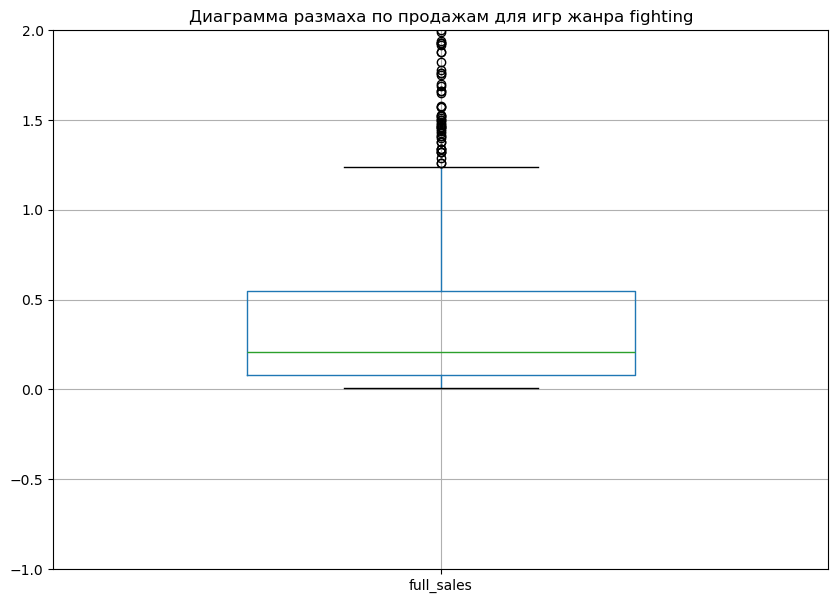

In [63]:
data.query('genre=="Fighting"').boxplot(figsize=(10,7))
plt.ylim(-1, 2)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра fighting");

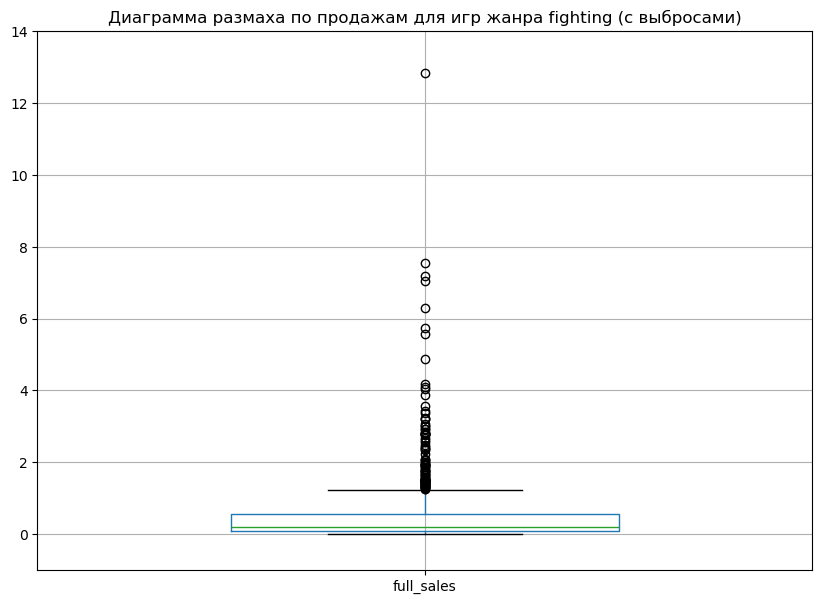

In [64]:
data.query('genre=="Fighting"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра fighting (с выбросами)");

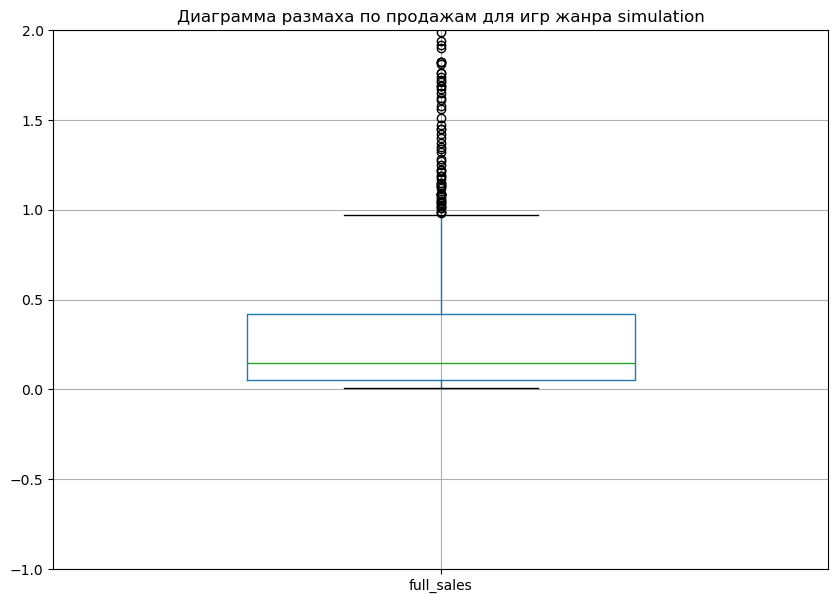

In [65]:
data.query('genre=="Simulation"').boxplot(figsize=(10,7))
plt.ylim(-1, 2)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра simulation");

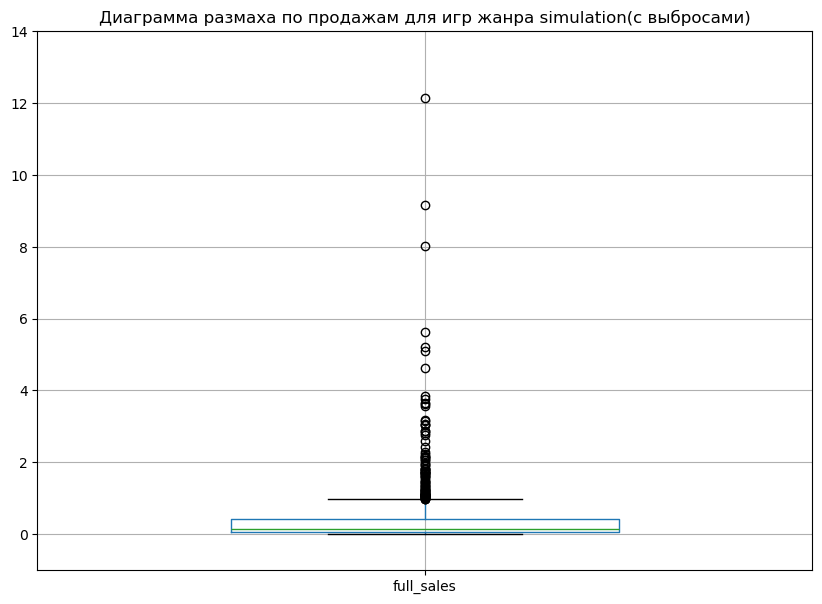

In [66]:
data.query('genre=="Simulation"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра simulation(с выбросами)");

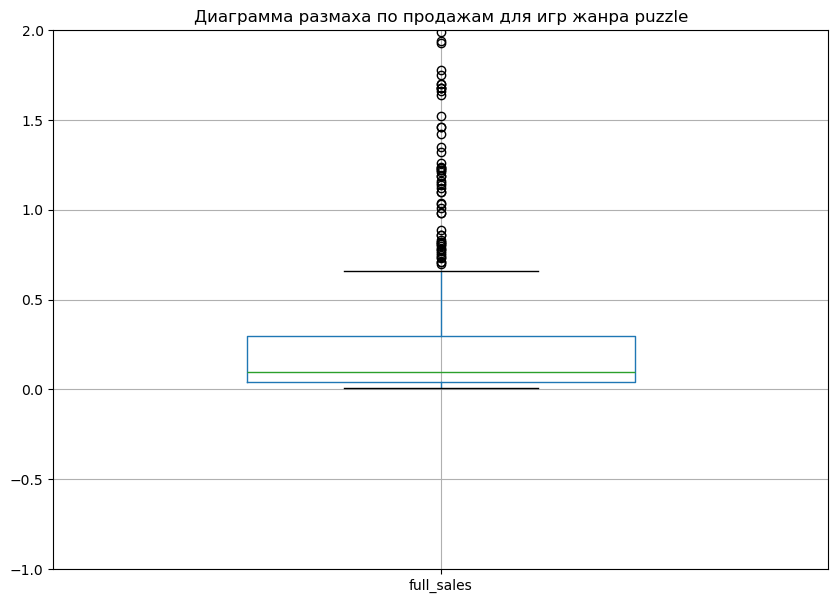

In [67]:
data.query('genre=="Puzzle"').boxplot(figsize=(10,7))
plt.ylim(-1, 2)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра puzzle");

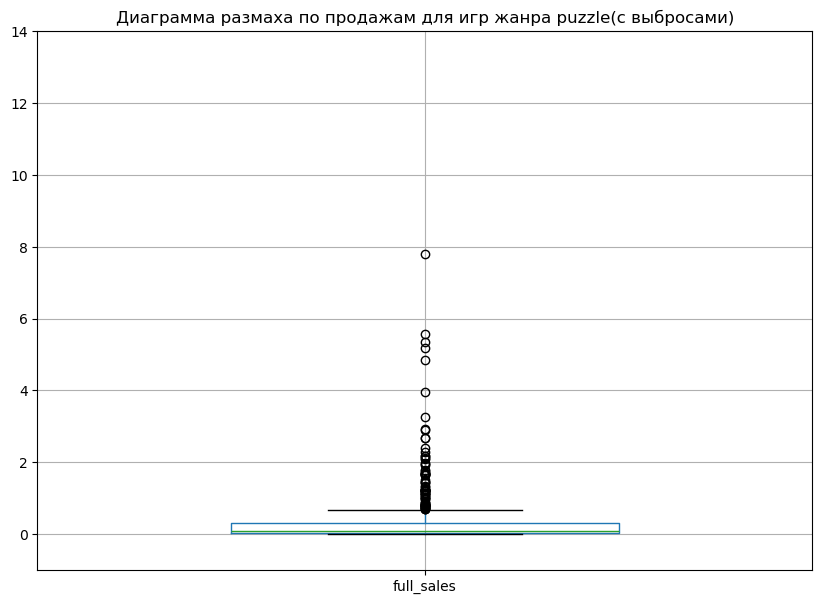

In [68]:
data.query('genre=="Puzzle"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра puzzle(с выбросами)");

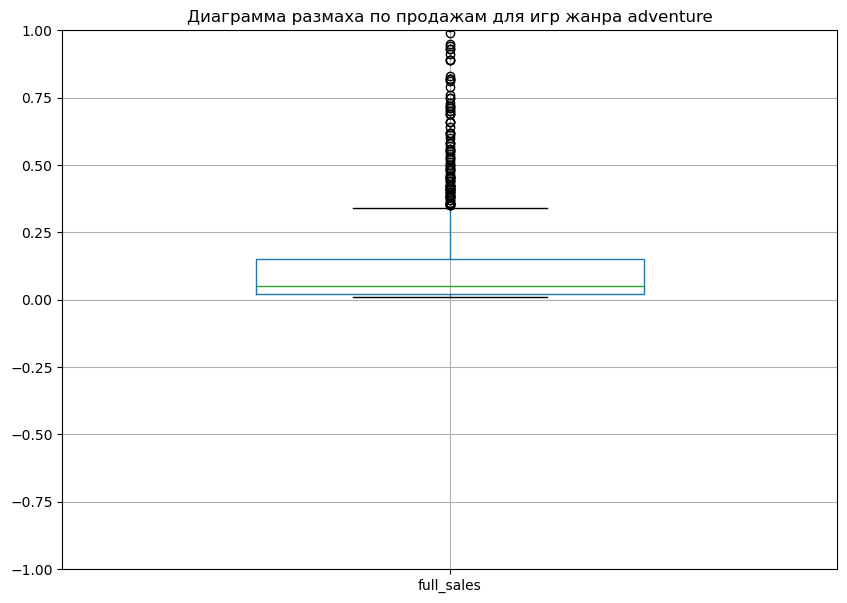

In [69]:
data.query('genre=="Adventure"').boxplot(figsize=(10,7))
plt.ylim(-1, 1)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра adventure");

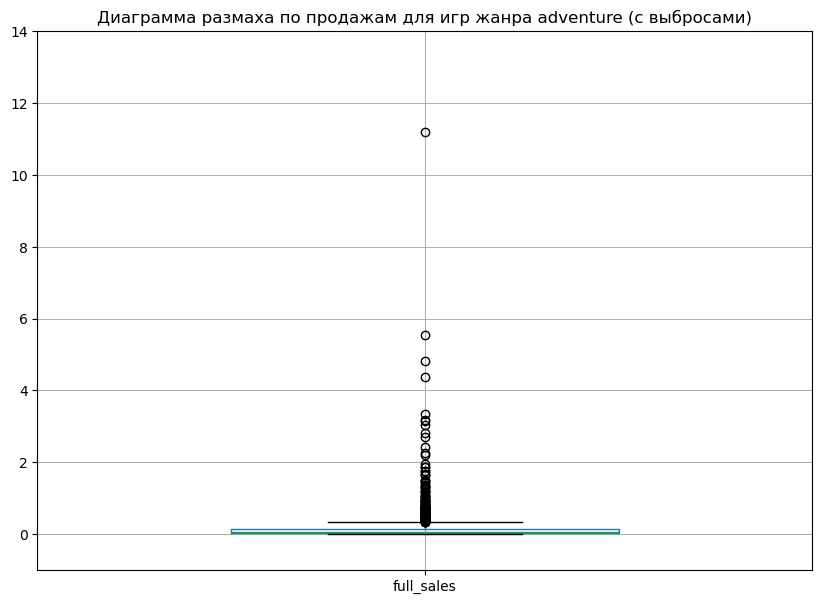

In [70]:
data.query('genre=="Adventure"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра adventure (с выбросами)");

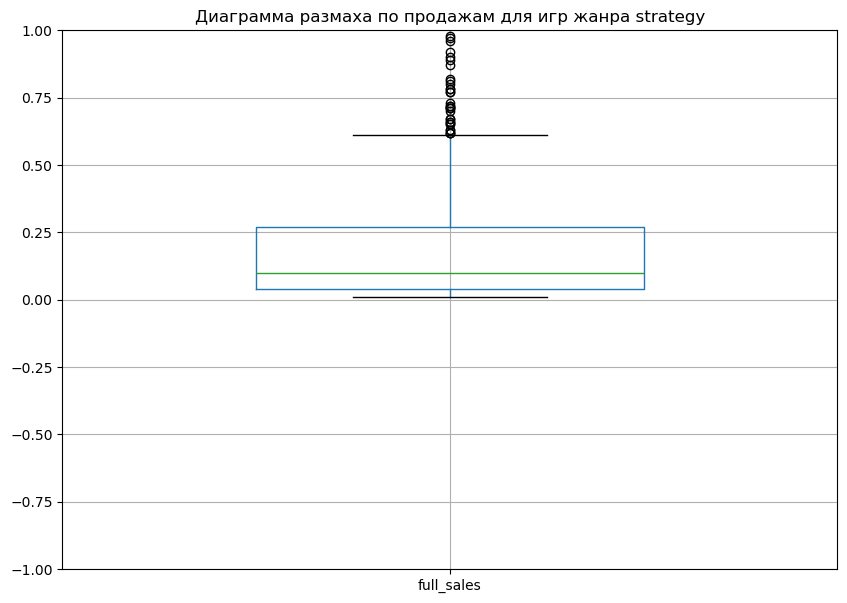

In [71]:
data.query('genre=="Strategy"').boxplot(figsize=(10,7))
plt.ylim(-1, 1)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра strategy");

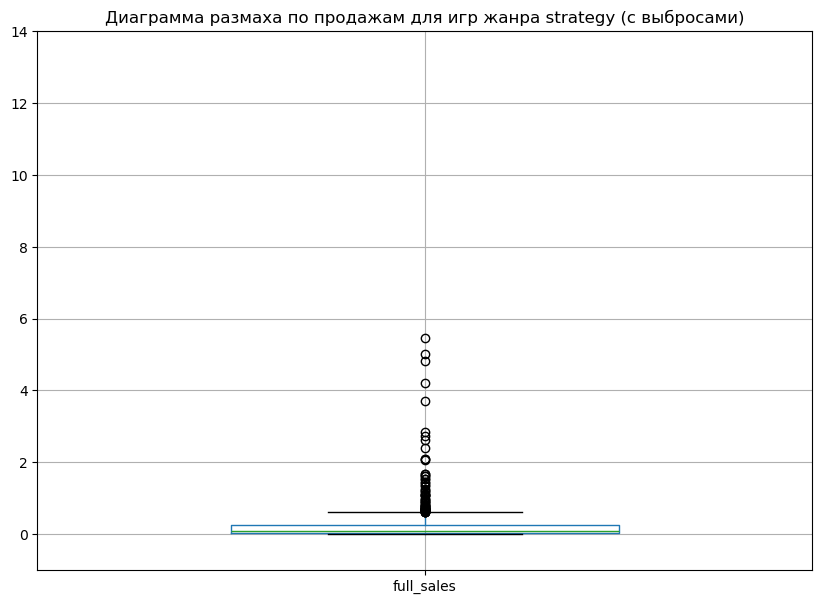

In [72]:
data.query('genre=="Strategy"').boxplot(figsize=(10,7))
plt.ylim(-1, 14)
plt.xlim(7.5, 8.5)
plt.title("Диаграмма размаха по продажам для игр жанра strategy (с выбросами)");

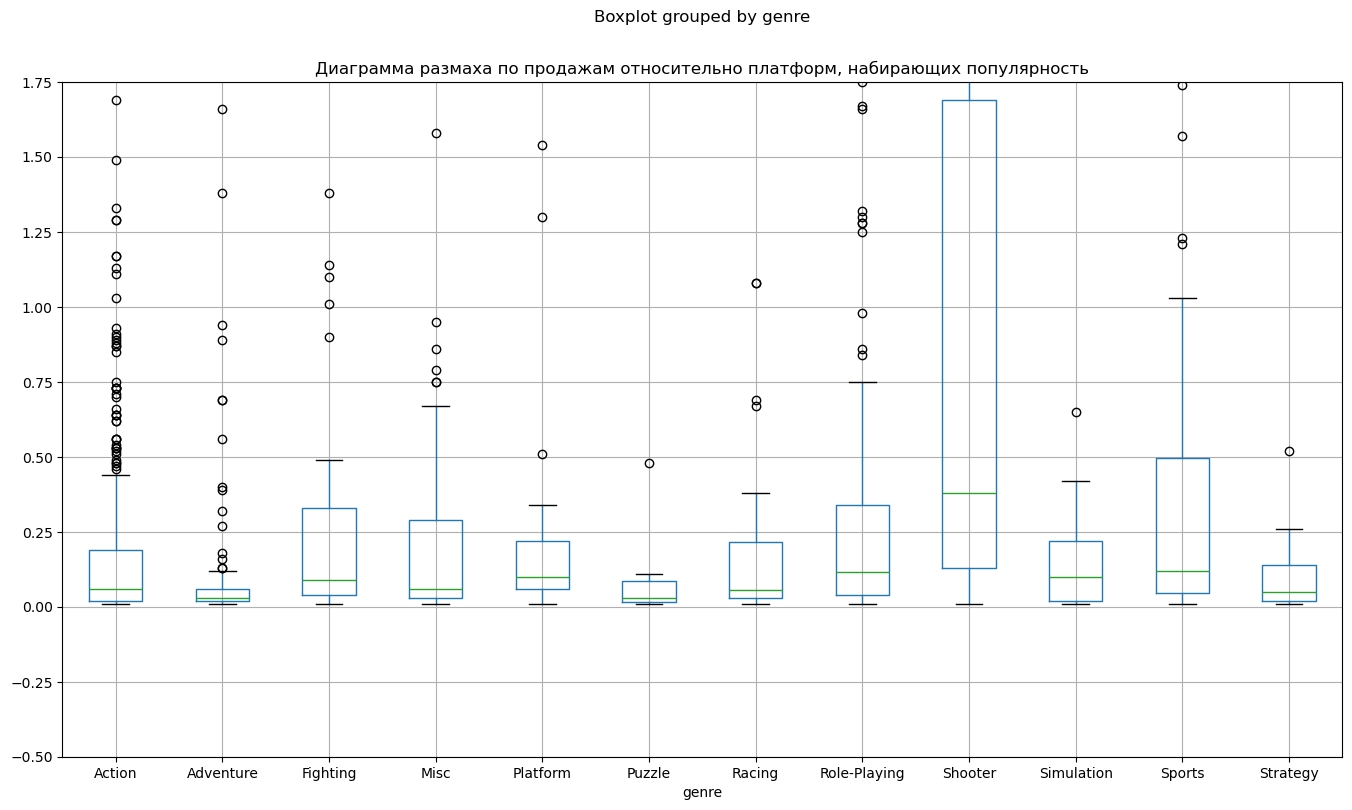

In [73]:
(data_actual.boxplot('full_sales', by='genre', figsize=(16,9))
.set_title('Диаграмма размаха по продажам относительно платформ, набирающих популярность'));
plt.ylim(-0.5, 1.75);


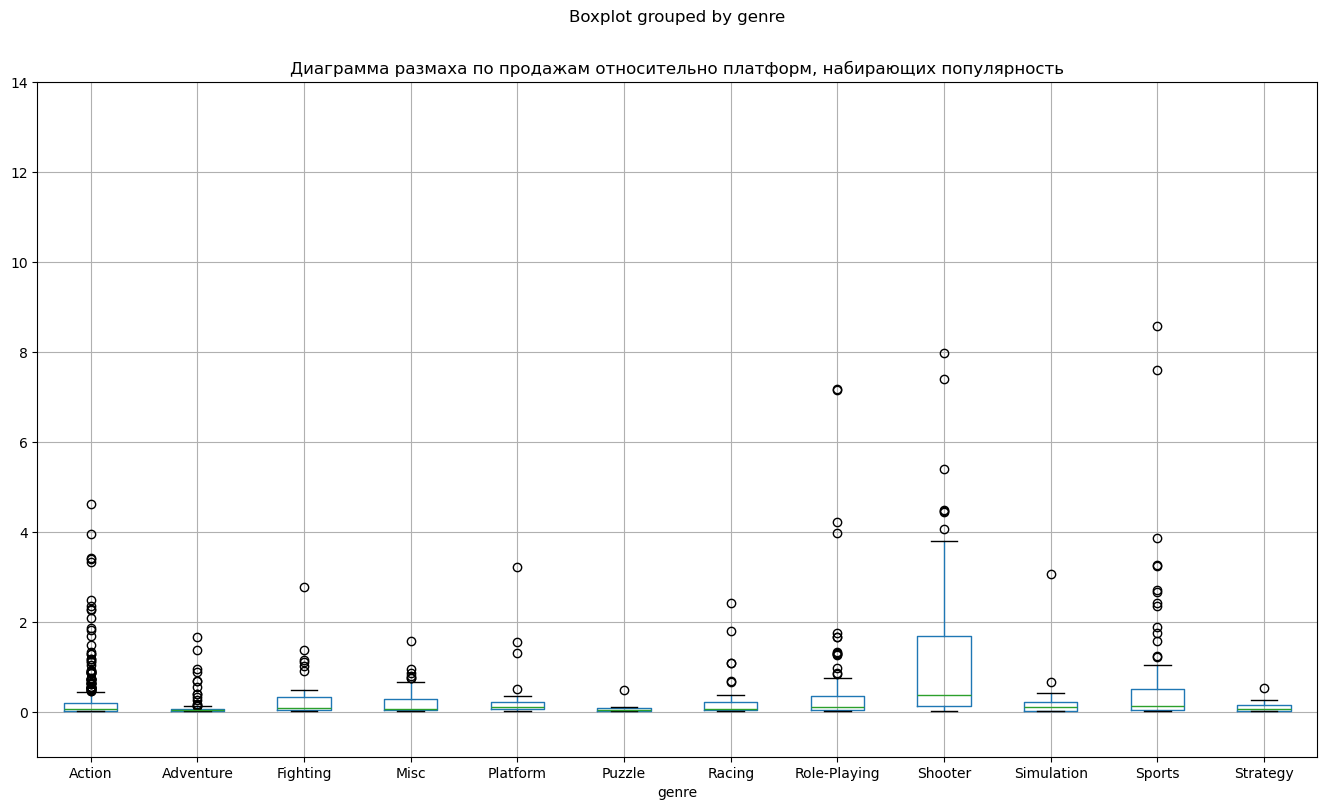

In [74]:
(data_actual.boxplot('full_sales', by='genre', figsize=(16,9))
.set_title('Диаграмма размаха по продажам относительно платформ, набирающих популярность'));
plt.ylim(-1, 14);


Посмотрим на 2 представленных диаграммы размаха. По диаграммам без выбросов можно выделить медианных лидеров- это Shooter, Sports, Fighter. Аутсайдеры- adventure и puzzle. По диаграммам с выбросами можно выделить, что в категориях Shooter, sports и role-playing есть игры, которые принесли своим создателям большую выручку.

В ходе исследовательского анализа мы сначала посмотрели распределение количества выпущенных игр в зависимости от года. Получили, что самое большое количество игр выпустили в 2008 и 2009 годах. Далее рассмотрели 10 самых популярных платформ. Получили 3 перспективные платформы: PS4, XBox One, 3DS. Выделили актуальный период поиска перспективных платформ-это 2 года. В целом, платформе требуется 4 года для того, чтобы с момента появления выйти на пик продаваемости игр. Ещё мы исследовали взаимосвязь перспективных плфторм с пользовательскими оценками и оценками критиков. Посмотрев на диаграммы рассеивания и матрицы корреляций мы получили, что связь видна только между оценками критиков и продаваемостью, с пользовательскими же оценками ситуация другая. По диаграммам рассеяния хорошо видны выбросы, по которым понятно, что пользовательские оценки даже самых продаваемых игр меньше, чем оценки критиков. Также рассмотрели продаваемость игр по жанрам. Получили, что самые непопулярные жанры- puzzle, adventure, strategy. А самые продаваемые- shooter, action, sports.

# 4. Портрет пользователя

In [75]:
data_new_actual=data.loc[data['year_of_release']>2013]
data_new_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [76]:
data_new_actual.groupby('platform').agg(objects=('name', 'count'), sales=('na_sales', 'sum')).sort_values(by='sales', ascending=False)

,objects,sales
platform,,
PS4,376,98.61
XOne,228,81.27
X360,111,28.30
3DS,212,22.64
PS3,219,22.05
WiiU,73,19.36
PC,151,7.23
PSV,295,2.52
Wii,11,2.08


In [77]:
data_platform_actual_all=(data_new_actual
                         .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum'))
data_platform_actual_all


,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


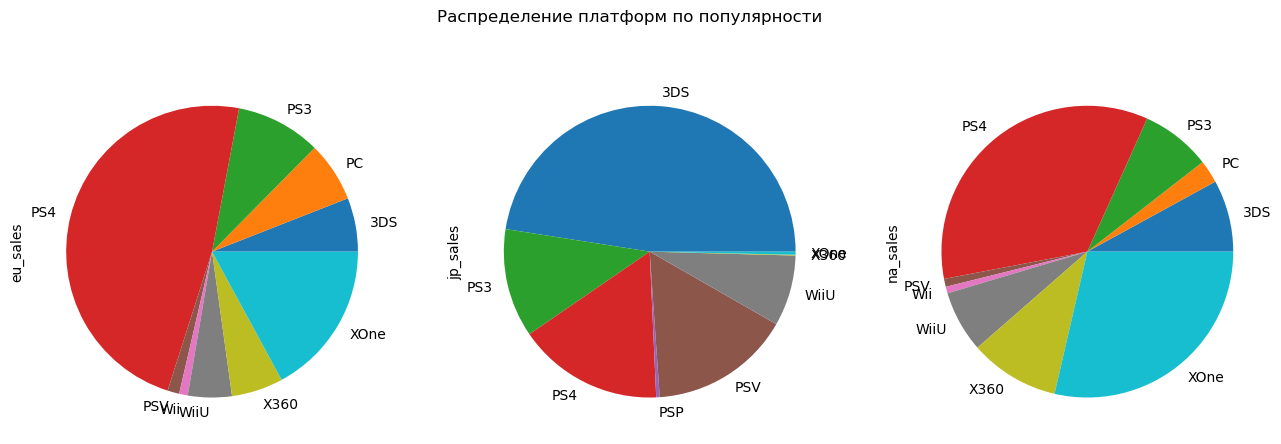

In [79]:
(data_platform_actual_all.plot
 .pie(legend=False, subplots=True, figsize=(16, 5), title='Распределение платформ по популярности'));


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> пример графиков
        
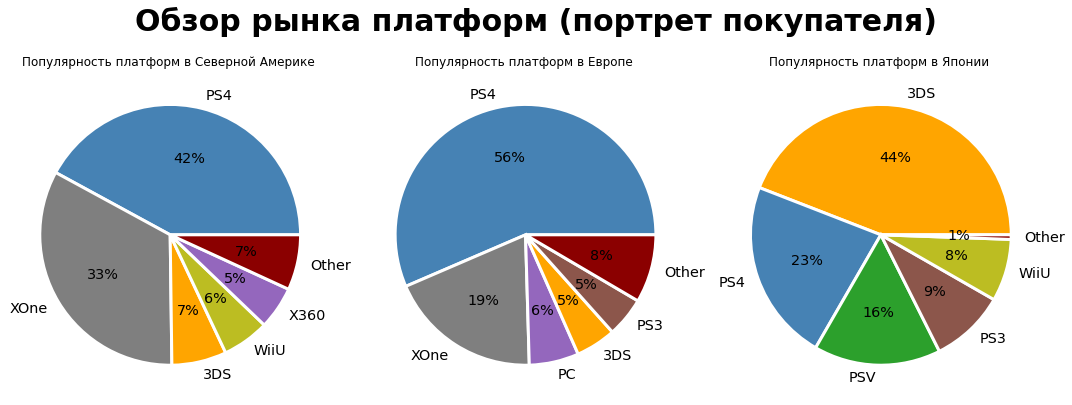        
        

__Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе__


В Европе сильно преобладает платформа PS4, исходя из актуальных данных. В Северной Америке пользователи почти одинаково отдают предпочтение платформам Ps4  и Xbox One. В Японии же с запасом лидирует 3DS.


In [87]:
data_genre_actual_all=(data_new_actual
                         .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum'))
data_genre_actual_all

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


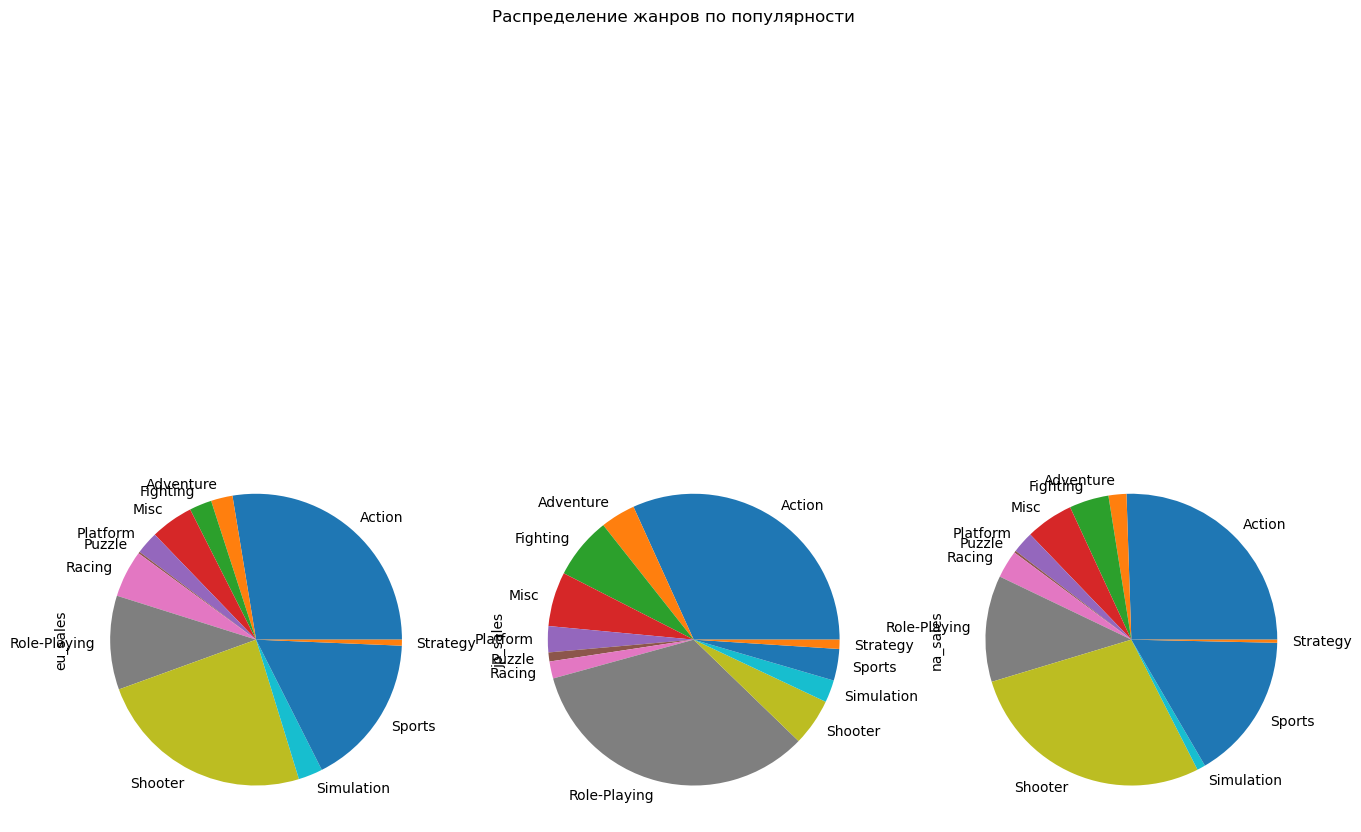

In [88]:
data_genre_actual_all.plot.pie(legend=False, subplots=True, figsize=(16, 13), title='Распределение жанров по популярности');


В Европе преобладают игры жанра action, в Северной Америке больше всего продаются игры жанра action и shooter, в Японии Role-playing и action

In [89]:
data_rating_actual_all=(data_new_actual
                         .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum'))
data_rating_actual_all

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95


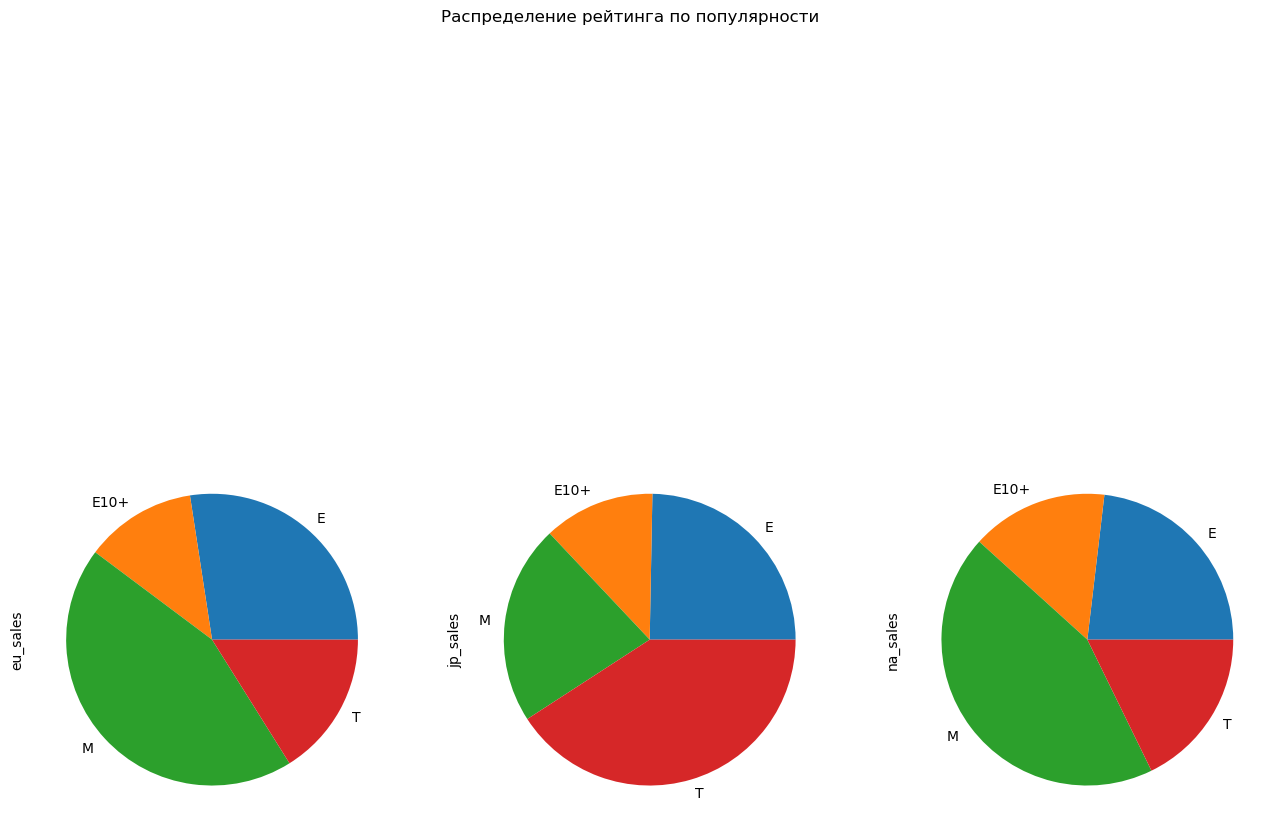

In [90]:
(data_rating_actual_all.plot.pie(legend=False, subplots=True, figsize=(16, 13), title='Распределение рейтинга по популярности'));


В Европе и Северной Америке преобладают игры с рейтингом "для взрослых". В Японии преобладают игры с рейтингом "для подростков"

Таким образом можем составить портрет пользователей. В Европе типичный пользователь использует PS4, action игра с рейтингом "для взрослых". В Северной Америке типичный геймер использует PS4 или Xbox One, играет в игры жанра action или shooter с рейтингом "для взрослых". В Японии предпочитают платформу 3DS, Role-Playing игры "для подростков".

# 5. Проверка гипотез

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1:Средние пользовательские рейтинги платформ Xbox One и PC различны

In [80]:
alpha= 0.05

In [81]:
data_xbox=data_actual.query('platform=="XOne"')

In [82]:
data_xbox.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
241,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
269,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
341,Star Wars Battlefront (2015),XOne,2015.0,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,NaN,3.66
411,Gears of War: Ultimate Edition,XOne,2015.0,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28


In [83]:
data_pc=data_actual.query('platform=="PC"')

In [84]:
data_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
1514,Fallout 4,PC,2015.0,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1709,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2811,The Witcher 3: Wild Hunt,PC,2015.0,Role-Playing,0.21,0.46,0.0,0.05,93.0,9.3,M,0.72
3080,Farming Simulator 17,PC,2016.0,Simulation,0.03,0.58,0.0,0.04,64.0,8.0,E,0.65
3615,Star Wars Battlefront (2015),PC,2015.0,Shooter,0.13,0.38,0.0,0.04,NaN,NaN,NaN,0.55


In [85]:
results = st.ttest_ind(
    data_pc.dropna()['user_score'], 
    data_xbox.dropna()['user_score'], alternative='two-sided')

print(results.pvalue)
if (results.pvalue<alpha):
    print('Пользовательские оценки платформ XOne и PC разные')
else:
    print('Не можем отвергнуть нулевую гипотезу: пользовательские оценки одинаковы')

0.2992275957685526
Не можем отвергнуть нулевую гипотезу: пользовательские оценки одинаковы


In [86]:
data_action=data.query('genre=="Action"')

In [87]:
data_sports=data.query('genre=="Sports"')

Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
Н1:Средние пользовательские рейтинги жанров Action и Sports разные

In [88]:
results_new = st.ttest_ind(
    data_action.dropna()['user_score'], 
    data_sports.dropna()['user_score'], alternative='two-sided')

print(results_new.pvalue)
if (results_new.pvalue<alpha):
    print('Пользовательские оценки жанра action и sports не равны')
else:
    print('Не можем отвергнуть нулевую гипотезу: пользовательские оценки одинаковы')

0.7733678964505282
Не можем отвергнуть нулевую гипотезу: пользовательские оценки одинаковы


# 6. Общий вывод

В данном проекте мы исследовали данные по играм. Проблем с данными выявлено немного. Были удалены строки, в которых нет названия игры или год выпуска. Также было удалено несколько неявных дубликатов. Пропуски в оценках и рейтинге трогать не стал. Поменял тип данных в колонке пользовательских оценок и добавил новую колонку со значениями суммарных продаж.Также изменили значения tbd в колонке пользовательских оценок на nan. Рассмотрели года выпуска игр и нашли года, в которые выпускалось самое большое число игр. Это 2008-2009 года. Далее мы исследовали популярность платформ и проанализировали топ-10 самых популярных. Выделили 3 актуальные платформы и рассмотрели связь продаж с оценками пользователей и критиков. Выяснили, что связь есть между количеством продаж и оценками критиков. Нашли самые популярные жанры. В топ-5 вошли: Action, sports, shooter, role-playing, platform. 

Далее мы описывали портрет пользователей каждого региона. В Европе типичный пользователь использует PS4, action игра с рейтингом "для взрослых". В Северной Америке типичный геймер использует PS4 или Xbox One, играет в игры жанра action или shooter с рейтингом "для взрослых". В Японии предпочитают платформу 3DS, Role-Playing игры "для подростков".

После этого мы проверили две гипотезы о равенстве пользовательских оценок игр на платформе Xbox one и PC. Сделали вывод, что нулевая гипотеза была принята 

Вторая гипотеза говорила о том, что средние пользовательские оценки игр жанра action и sports разные. Эта гипотеза была отвергнута.